# 12.1 分类数据

In [2]:
import numpy as np;import pandas as pd
values = pd.Series(['apple', 'orange', 'apple','apple'] * 2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [3]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [4]:
pd.value_counts(values)

apple     6
orange    2
dtype: int64

In [5]:
values = pd.Series([0, 1, 0, 0] * 2)
dim = pd.Series(['apple', 'orange'])
values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [6]:
dim

0     apple
1    orange
dtype: object

In [7]:
#可以使用take方法存储原始的字符串Series：
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

这种用整数表示的方法称为分类或字典编码表示法。不同值得数组称为分类、字典或数据级。本书中，我们使用分类的说法。表示分类的整数值称为分类编码或简单地称为编码。

分类表示可以在进行分析时大大的提高性能。你也可以在保持编码不变的情况下，对分类进行转换。一些相对简单的转变例子包括：
重命名分类。
加入一个新的分类，不改变已经存在的分类的顺序或位置。

## pandas的分类类型

In [8]:
#pandas有一个特殊的分类类型，用于保存使用整数分类表示法的数据。
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)
df = pd.DataFrame({'fruit': fruits,'basket_id': np.arange(N),
                   'count': np.random.randint(3, 15, size=N),
                   'weight': np.random.uniform(0, 4, size=N)},
                  columns=['basket_id', 'fruit', 'count', 'weight'])
df

,basket_id,fruit,count,weight
0,0,apple,9,1.861916
1,1,orange,14,2.396520
2,2,apple,3,2.793258
3,3,apple,14,3.592759
4,4,apple,11,2.099441
5,5,orange,6,2.225926
6,6,apple,10,0.930083
7,7,apple,3,3.993991


In [9]:
#这里，df['fruit']是一个Python字符串对象的数组。我们可以通过调用它，将它转变为分类：
fruit_cat = df['fruit'].astype('category')
df['fruit']

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: object

In [10]:
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [12]:
#分类对象有categories和codes属性：
c = fruit_cat.values
c.categories

Index(['apple', 'orange'], dtype='object')

In [13]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [14]:
#你还可以从其它Python序列直接创建pandas.Categorical：
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])
my_categories

[foo, bar, baz, foo, bar]
Categories (3, object): [bar, baz, foo]

In [17]:
categories = ['foo', 'bar', 'baz']
codes = [0,2,1,0,0,1]
my_cats_2 = pd.Categorical.from_codes(codes, categories)
my_cats_2

[foo, baz, bar, foo, foo, bar]
Categories (3, object): [foo, bar, baz]

In [19]:
ordered_cat = pd.Categorical.from_codes(codes, categories,ordered=True)
ordered_cat

[foo, baz, bar, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

输出[foo < bar < baz]指明‘foo’位于‘bar’的前面，以此类推。无序的分类实例可以通过as_ordered排序：

In [20]:
my_cats_2.as_ordered()

[foo, baz, bar, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

## 用分类进行计算

In [21]:
np.random.seed(12345)
draws = np.random.randn(1000)
draws[:5]
bins = pd.qcut(draws, 4)
bins

[(-0.684, -0.0101], (-0.0101, 0.63], (-0.684, -0.0101], (-0.684, -0.0101], (0.63, 3.928], ..., (-0.0101, 0.63], (-0.684, -0.0101], (-2.9499999999999997, -0.684], (-0.0101, 0.63], (0.63, 3.928]]
Length: 1000
Categories (4, interval[float64]): [(-2.9499999999999997, -0.684] < (-0.684, -0.0101] < (-0.0101, 0.63] < (0.63, 3.928]]

虽然有用，确切的样本分位数与分位的名称相比，不利于生成汇总。我们可以使用labels参数qcut，实现目的：

In [22]:
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
bins

[Q2, Q3, Q2, Q2, Q4, ..., Q3, Q2, Q1, Q3, Q4]
Length: 1000
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [30]:
bins = pd.Series(bins, name='quartile')
results = (pd.Series(draws).groupby(bins).agg(['count', 'min', 'max']).reset_index())
results

,quartile,count,min,max
0,Q1,250,-2.949343,-0.685484
1,Q2,250,-0.683066,-0.010115
2,Q3,250,-0.010032,0.628894
3,Q4,250,0.634238,3.927528


## 分类方法

In [31]:
#将标签转换为分类
s = pd.Series(['a', 'b', 'c', 'd'] * 2)
cat_s = s.astype('category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

In [32]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [33]:
cat_s.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [38]:
#假设我们知道这个数据的实际分类集，超出了数据中的四个值。我们可以使用set_categories方法改变它们：
actual_categories = ['a', 'c', 'b']
cat_s2 = cat_s.cat.set_categories(actual_categories)
cat_s2

0      a
1      b
2      c
3    NaN
4      a
5      b
6      c
7    NaN
dtype: category
Categories (3, object): [a, c, b]

In [39]:
cat_s.value_counts()

d    2
c    2
b    2
a    2
dtype: int64

In [40]:
cat_s2.value_counts()

b    2
c    2
a    2
dtype: int64

在大数据集中，分类经常作为节省内存和高性能的便捷工具。过滤完大DataFrame或Series之后，许多分类可能不会出现在数据中。我们可以使用remove_unused_categories方法删除没看到的分类：

In [43]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]
cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): [a, b, c, d]

In [44]:
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): [a, b]

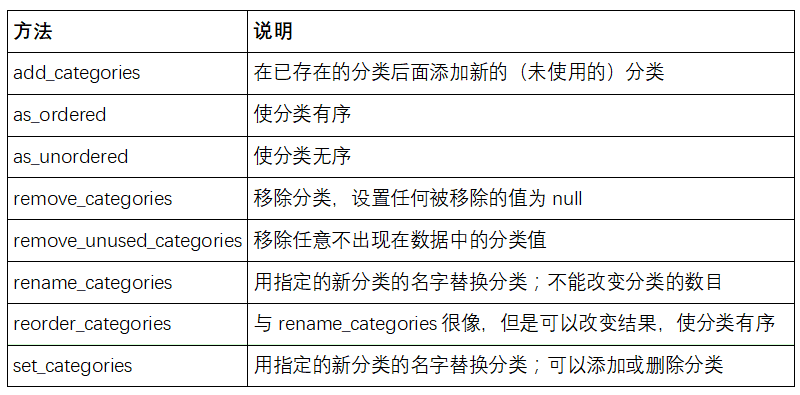

## 为建模创建虚拟变量

当你使用统计或机器学习工具时，通常会将分类数据转换为虚拟变量，也称为one-hot编码。这包括创建一个不同类别的列的DataFrame；这些列包含给定分类的1s，其它为0。

In [45]:
cat_s = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype='category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

In [46]:
#pandas.get_dummies函数可以转换这个分类数据为包含虚拟变量的DataFrame：
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


# 12.2 GroupBy高级应用

## 分组转换和“解封”GroupBy

In [47]:
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4, 'value': np.arange(12.)})
g = df.groupby('key').value
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [51]:
#假设我们想产生一个和df['value']形状相同的Series，但值替换为按键分组的平均值。我们可以传递函数lambda x: x.mean()进行转换：
g.transform(lambda x:x.mean())
#g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

与apply类似，transform的函数会返回Series，但是结果必须与输入大小相同。

In [53]:
#举一个复杂的例子，我们可以计算每个分组的降序排名：
g.transform(lambda x: x.rank(ascending=False))

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

In [54]:
#看一个由简单聚合构造的的分组转换函数：
def normalize(x):
    return (x - x.mean()) / x.std()
g.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

内置的聚合函数，比如mean或sum，通常比apply函数快，也比transform快。这允许我们进行一个所谓的解封（unwrapped）分组操作：

In [55]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [57]:
normalized = (df['value'] - g.transform('mean')) / g.transform('std')
normalized

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

## 分组的时间重采样

In [58]:
#对于时间序列数据，resample方法从语义上是一个基于内在时间的分组操作。
N = 15
times = pd.date_range('2017-05-20 00:00', freq='1min', periods=N)
df = pd.DataFrame({'time': times, 'value': np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [60]:
#这里，我们可以用time作为索引，然后重采样：
df.set_index('time').resample('4min').count()

,value
time,
2017-05-20 00:00:00,4
2017-05-20 00:04:00,4
2017-05-20 00:08:00,4
2017-05-20 00:12:00,3


In [62]:
#假设DataFrame包含多个时间序列，用一个额外的分组键的列进行标记：
df2 = pd.DataFrame({'time': times.repeat(3),'key': np.tile(['a', 'b', 'c'], N),'value': np.arange(N * 3.)})
df2[:7]

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [66]:
#要对每个key值进行相同的重采样，我们引入pandas.TimeGrouper对象：
time_key = pd.TimeGrouper('5min')
resampled = (df2.set_index('time').groupby(['key', time_key]).sum())
resampled

d:\python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

# 12.3 链式编程技术